In [1]:
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt

from envs.single_photon_env import SinglePhotonLangevinReadoutEnv

In [2]:
# Seeding everything

seed = 30

rng = jax.random.PRNGKey(seed)
rng, _rng = jax.random.split(rng)

In [11]:
# CLEAR Regime Params
tau_0 = 1.0
kappa = 1/0.14
chi = 2.6 * 2. * jnp.pi
kerr = 0.002
gamma = 1/140
n0 = 3.6
res_amp_scaling = 1/0.5
actual_max_photons = n0 * (1. - jnp.exp(-0.5 * kappa * tau_0)) ** 2
print(f"Rough Max Photons: {n0}")
print(f"Actual Max Photons: {actual_max_photons}")
nR = 0.1
snr_scale_factor = 1.
gamma_I = 1/140
num_t1 = 8.0
photon_gamma = 1/1500
init_fid = 1 - 1e-4
photon_weight = 4.0
shot_noise_std = 0.0
standard_fid = 0.99

time_coeff = 10.0
snr_coeff = 10.0
smoothness_coeff = 0.0
smoothness_baseline_scale = 1.0
apply_smoothing = True
use_processed_action = True
bandwidth = 50.0
freq_relative_cutoff = 0.1
bandwidth_coeff = 0.
apply_bandwidth_constraint = True

env_config = {"kappa": kappa,
    "chi": chi,
    "kerr": kerr,
    "time_coeff": time_coeff,
    "snr_coeff": snr_coeff,
    "smoothness_coeff": smoothness_coeff,
    "smoothness_baseline_scale": smoothness_baseline_scale,
    "apply_smoothing": apply_smoothing,
    "use_processed_action": use_processed_action,
    "bandwidth": bandwidth,
    "freq_relative_cutoff": freq_relative_cutoff,
    "bandwidth_coeff": bandwidth_coeff,
    "apply_bandwidth_constraint": apply_bandwidth_constraint,
    "n0": n0,
    "tau_0": tau_0,
    "res_amp_scaling": res_amp_scaling,
    "nR": nR,
    "snr_scale_factor": snr_scale_factor,
    "gamma_I": gamma_I,
    "photon_gamma": photon_gamma,
    "num_t1": num_t1,
    "init_fid": init_fid,
    "photon_weight": photon_weight,
    "standard_fid": standard_fid,
    "shot_noise_std": shot_noise_std,
}

env_name = "single_langevin_env"

Rough Max Photons: 3.6
Actual Max Photons: 3.4004130149706335


In [12]:
from utils import photon_env_dicts

env = photon_env_dicts()[env_name](**env_config)

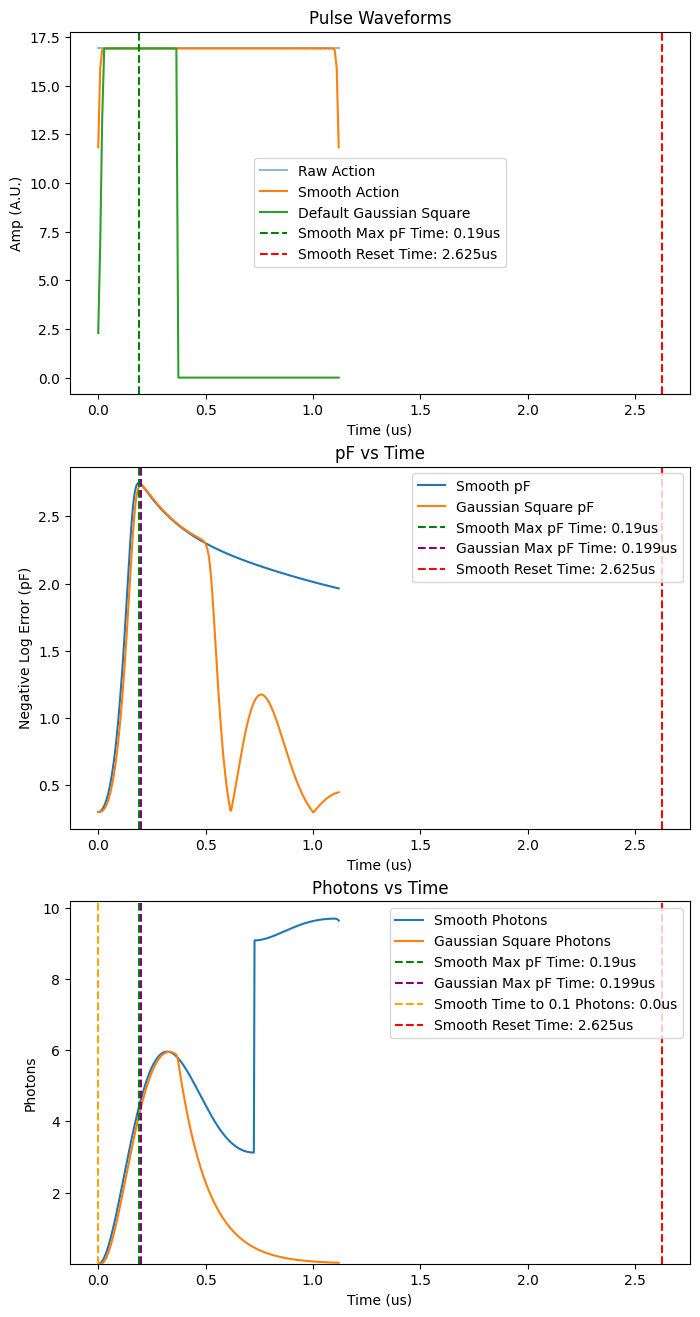

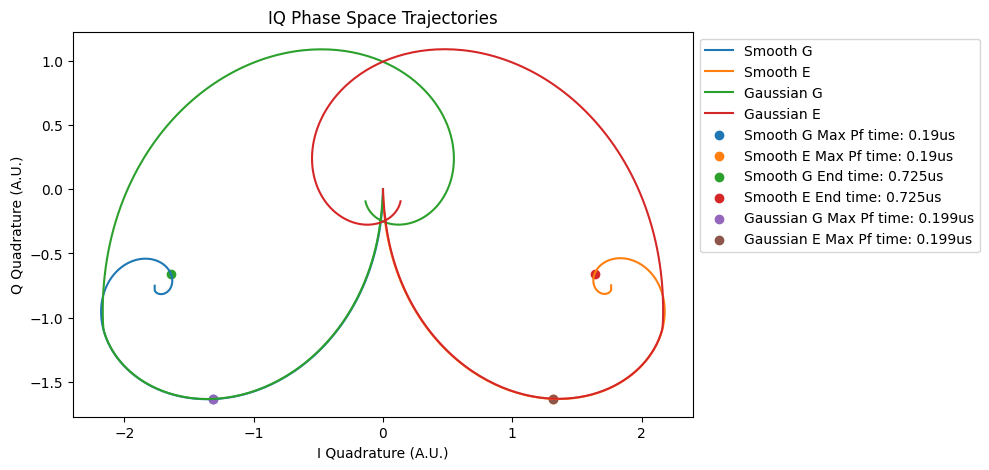

In [13]:
standard_action = jnp.ones_like(env.ts_action)

env.rollout_action(_rng, standard_action)